In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('kohli_tests.xlsx')

In [4]:
df

,Inning,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
0,1,4,13,10,1,0,40.00,5,caught,1,v West Indies,Kingston,2011-06-20
1,2,15,72,54,2,0,27.77,5,caught,3,v West Indies,Kingston,2011-06-20
2,3,0,1,2,0,0,0.00,5,caught,1,v West Indies,Bridgetown,2011-06-28
3,4,27,118,107,1,1,25.23,5,caught,3,v West Indies,Bridgetown,2011-06-28
4,5,30,62,53,2,0,56.60,5,caught,2,v West Indies,Roseau,2011-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,186,517,364,15,0,51.09,4,caught,2,v Australia,Ahmedabad,2023-03-09
183,184,14,56,31,2,0,45.16,4,caught,2,v Australia,The Oval,2023-06-07
184,185,49,115,78,7,0,62.82,4,caught,4,v Australia,The Oval,2023-06-07
185,186,76,262,182,5,0,41.75,4,caught,2,v West Indies,Roseau,2023-07-12


In [5]:
# Filtering the DataFrame to include data up to the 50th inning
df_up_to_50th_inning = df[df['Inning'] <= 50]

# Calculating the total runs scored up to the 50th inning
total_runs_up_to_50th_inning = df_up_to_50th_inning['Runs'].sum()

# Calculating the total dismissals up to the 50th inning
total_dismissals_up_to_50th_inning = (df_up_to_50th_inning['Dismissal'] != 'not out').sum()

# Calculating the batting average after 50 innings
batting_average_after_50th_inning = total_runs_up_to_50th_inning / total_dismissals_up_to_50th_inning

print("Batting average after 50 innings:", batting_average_after_50th_inning)

Batting average after 50 innings: 39.891304347826086


In [7]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterating through innings in increments of 50
for start_inning in range(1, df['Inning'].max() + 1, 50):
    end_inning = start_inning + 49  # Calculate the end inning for the range
    
    # Filtering the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculating the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Appending the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Creating a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

print("Virat Kohli's batting averages by intervals of 50 innings")
print(averages_table)


Virat Kohli's batting averages by intervals of 50 innings
  Inning Range  Batting Average
0         1-50        39.891304
1       51-100        59.170213
2      101-150        59.255319
3      151-200        35.416667


In [8]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterate through innings in increments of 25
for start_inning in range(1, df['Inning'].max() + 1, 25):
    end_inning = start_inning + 24  # Calculate the end inning for the range
    
    # Filter the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculate the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Append the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Create a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

# Display the table
print(averages_table)


  Inning Range  Batting Average
0         1-25        38.739130
1        26-50        41.043478
2        51-75        56.240000
3       76-100        62.500000
4      101-125        71.583333
5      126-150        46.391304
6      151-175        28.875000
7      176-200        48.500000


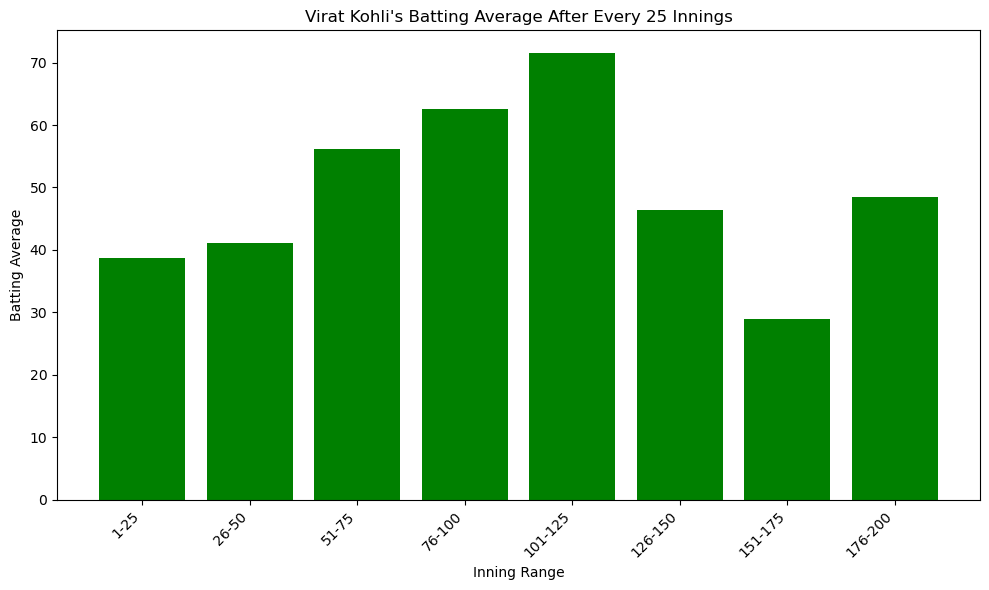

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(averages_table['Inning Range'], averages_table['Batting Average'], color='green')
plt.title("Virat Kohli's Batting Average After Every 25 Innings")
plt.xlabel("Inning Range")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

   Inning  Runs
0      25   891
1      50  1835
2      75  3241
3     100  4616
4     125  6334
5     150  7401
6     175  8094


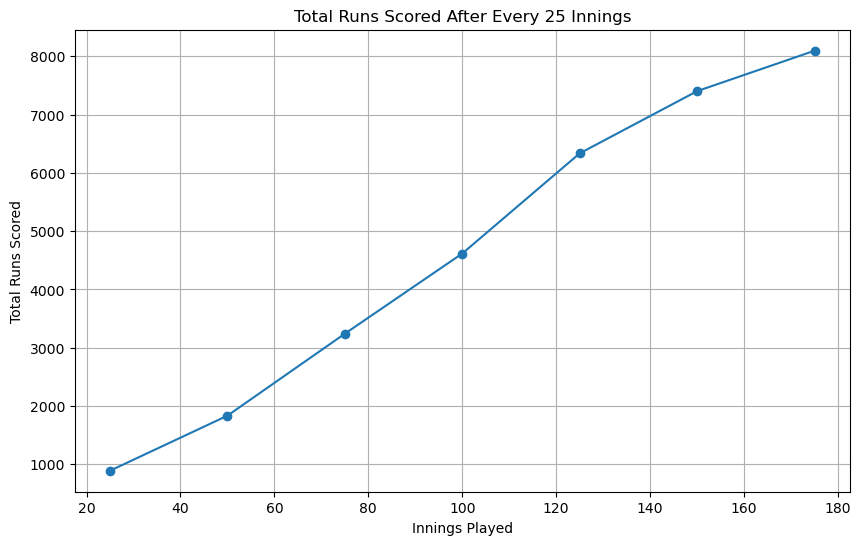

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the innings and total runs
innings_played = []
total_runs_scored = []

# Initializing variables for the cumulative sum
cumulative_runs = 0
innings_counter = 0

# Iterating through the DataFrame to calculate total runs after every 25 innings
for index, row in df.iterrows():
    innings_counter += 1
    cumulative_runs += row['Runs']
    
    # Check if 25 innings have been completed
    if innings_counter % 25 == 0:
        innings_played.append(innings_counter)
        total_runs_scored.append(cumulative_runs)

# Creating a DataFrame from the lists
totals_df = pd.DataFrame({'Inning': innings_played, 'Runs': total_runs_scored})

print(totals_df)

# Creating a line graph to visualize total runs scored after every 25 innings
plt.figure(figsize=(10, 6))
plt.plot(totals_df['Inning'], totals_df['Runs'], marker='o', linestyle='-')
plt.title("Total Runs Scored After Every 25 Innings")
plt.xlabel("Innings Played")
plt.ylabel("Total Runs Scored")
plt.grid(True)
plt.show()


  Innings Interval  Runs
0             1-25   891
1            26-50   944
2            51-75  1406
3           76-100  1375
4          101-125  1718
5          126-150  1067
6          151-175   693


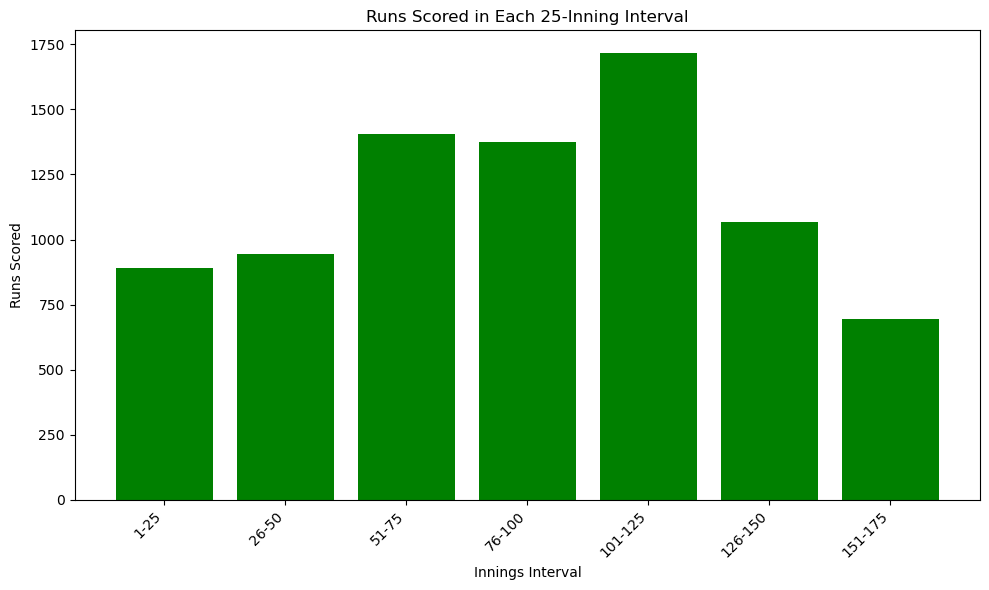

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the intervals and runs scored in each interval
innings_intervals = []
runs_in_interval = []

# Initializing variables for tracking the interval
interval_start = 1
interval_end = 25
interval_runs = 0

# Iterating through the DataFrame to calculate runs scored in each 25-inning interval
for index, row in df.iterrows():
    innings_played = row['Inning']
    runs_scored = row['Runs']
    
    if innings_played >= interval_start and innings_played <= interval_end:
        interval_runs += runs_scored
    
    # Check if 25 innings have been completed
    if innings_played == interval_end:
        innings_intervals.append(f"{interval_start}-{interval_end}")
        runs_in_interval.append(interval_runs)
        
        # Update interval variables
        interval_start = interval_end + 1
        interval_end += 25
        interval_runs = 0

# Creating a DataFrame from the lists
interval_df = pd.DataFrame({'Innings Interval': innings_intervals, 'Runs': runs_in_interval})

print(interval_df)

plt.figure(figsize=(10, 6))
plt.bar(interval_df['Innings Interval'], interval_df['Runs'], color='green')
plt.title("Runs Scored in Each 25-Inning Interval")
plt.xlabel("Innings Interval")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
